In [1]:
%reload_ext autoreload
%autoreload 2
import os
os.chdir("../..")

In [2]:
from common.music_item import XMLItem, MidiItem
import archs.instruments.generate as ints
from archs.instruments.synthesis import Synthesis
from IPython.display import Audio
import numpy as np
import time
import librosa
import music21
import archs.voice_synth.voice_interface as vi

/home/vimusic/anaconda3/envs/vimusic/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/home/vimusic/anaconda3/envs/vimusic/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [ ]:
item = XMLItem()
item.from_file('archs/instruments/numb.mxl')
#Normal mastering
midi = ints.mastering(item.score, 'rock4', 0, ints.OUTPUT_TYPE.MIDI_OBJ)

In [ ]:
##reconfigure the offsets
offsets = [0.5, 0.3, 0.3, 0.3, 0.3, 0.3, 1]
for off, ins in zip(offsets, midi.instruments):
    ins.amplitude_offset = off

In [ ]:
arr = Synthesis.to_wav_array(midi)
Audio(arr, rate=44100, normalize=False)

### Voice only

In [3]:
def convert_text_syllable_to_phonemes_syllable(score):
    string = ''
    
    concat_text = ''
    concat_syllable_note_index = []
    start_concat_text = False

    notes_with_lyric = score.parts[0].flat.lyrics()[1]
    
    for index, note in enumerate(notes_with_lyric):
        if note is None:
            continue

        if note.syllabic == 'single':
            sylls, stress = vi.word_to_syllable_phonemes(note.text)
            string += note.text + ' '

            note.text = sylls[0]

        if note.syllabic in ['begin', 'end'] or start_concat_text:
            concat_text += note.text
            concat_syllable_note_index.append(index)
            start_concat_text = True

        if note.syllabic == 'end':
            start_concat_text = False

            sylls, stresses = vi.word_to_syllable_phonemes(concat_text)
            string += concat_text + ' '

            for idx, note_index in enumerate(concat_syllable_note_index):
                notes_with_lyric[note_index].text = sylls[idx]

                
            concat_text = ''
            concat_syllable_note_index = []
            
    return string

In [4]:
model = vi.VoiceDNN(2)

In [5]:
s = music21.converter.parse('.cache/.result/2bad1ddf-9c9a-4b43-a4bc-a2ae2c9f94da.xml')
s = music21.converter.parse('.cache/.result/dc5d2ab9-66de-453f-9aac-c2374097ce35.xml')
s = music21.converter.parse('.cache/.result/f1931040-c9df-4c7b-a6ef-e5b7d16a5479.xml')
s = music21.converter.parse('.cache/.result/7f7d0d5d-790d-43c4-9a9c-360facc663fe.xml')


import time

start_time = time.time()
arr, rate = model.generate(s, 90)
print(time.time() - start_time)

Audio(arr, rate = rate, normalize=False)

1.3429880142211914


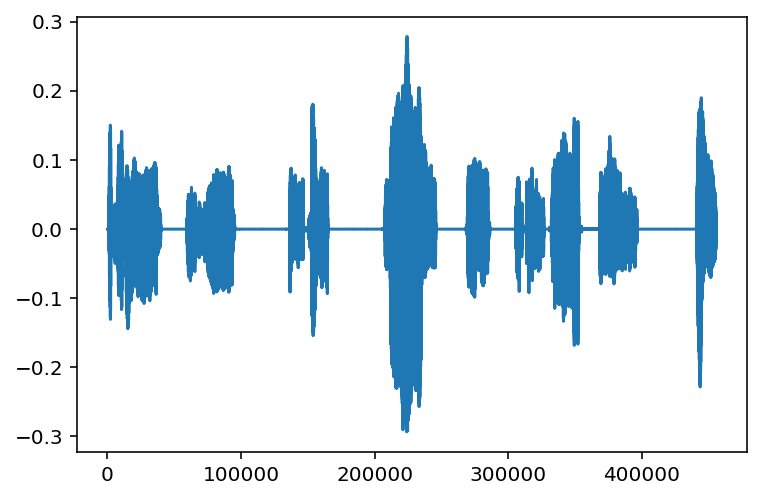

In [14]:
import matplotlib.pyplot as plt
plt.plot(arr)

In [ ]:
s = music21.converter.parse('archs/voice_synth/mellotron/data/song_en.musicxml')
s = music21.converter.parse('archs/voice_synth/mellotron/data/song_en_missing_lyrics.musicxml')

string = convert_text_syllable_to_phonemes_syllable(s); string
s = vi.create_test_score()

arr, rate = model.generate(s, 90, method1=False)

Audio(arr, rate = rate, normalize=True)

### Voice and Mastering

In [5]:
s = music21.converter.parse('archs/instruments/test_data/test.xml')
s = music21.converter.parse('.cache/.result/7f7d0d5d-790d-43c4-9a9c-360facc663fe.xml')
start_time = time.time()

arrr = ints.mastering(s, 'pop', 3, ints.OUTPUT_TYPE.WAV_FILE, "pop.wav", voice_model_instance=model, tempo=90)
arrr = ints.mastering(s, 'rock', 3, ints.OUTPUT_TYPE.WAV_FILE, "rock.wav", voice_model_instance=model, tempo=90)
arrr = ints.mastering(s, 'electro', 3, ints.OUTPUT_TYPE.WAV_FILE, "electro.wav", voice_model_instance=model, tempo=90)

print(time.time() - start_time)


Audio(filename="out.wav")
# Audio(arrr, rate = 44100, normalize=False) 

archs/instruments/genre_templates/pop/pop1.json
Voice synthesis


RuntimeError: CUDA out of memory. Tried to allocate 432.00 MiB (GPU 2; 10.76 GiB total capacity; 996.61 MiB already allocated; 340.56 MiB free; 1.05 GiB reserved in total by PyTorch)

In [8]:
a = np.array((1,2,3,10,100,2))

In [13]:
a[np.where( (a > 20))[0]]

array([100])

In [6]:
import scipy.io.wavfile as wv

In [7]:
wv.write("pop.wav", 44100, arrr)

### Another Setting

In [ ]:
# With voice
s = music21.converter.parse('archs/instruments/test_data/song_en_short.xml')

arrr = ints.mastering(s, 'rock1', 1, ints.OUTPUT_TYPE.WAV_ARRAY)
Audio(arrr, rate = 44100, normalize=False)